# Kalibrierung eines Thermometers
### Eine Beispielanwendung von Regressionsverfahren

In [1]:
import pandas as pd

df = pd.read_csv("./temp.csv")

In [2]:
df.head(100)

,R_Ohm,Grad_Celsius
0,73,-15
1,56,-10
2,44,-5
3,33,0
4,26,5
5,20,10
6,15,15


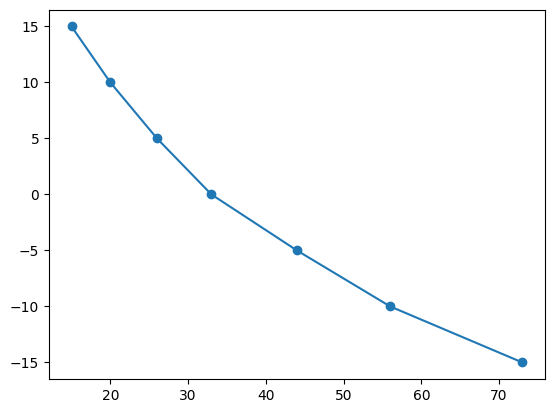

In [3]:
import matplotlib.pyplot as plt
plt.plot(df[["R_Ohm"]], df[["Grad_Celsius"]])
plt.scatter(df[["R_Ohm"]], df[["Grad_Celsius"]])

In [4]:
# Beispiel: Normale, lineare Regression

X = df[["R_Ohm"]].values
Y = df[["Grad_Celsius"]].values

#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42, test_size = 0.25)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)

print(model.score(X, Y))

0.9548443665059184


In [5]:
model.predict([[50]])

array([[-6.00394564]])

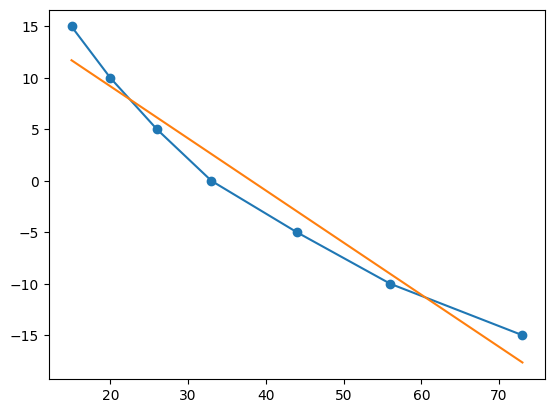

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(df[["R_Ohm"]], df[["Grad_Celsius"]])
plt.scatter(df[["R_Ohm"]], df[["Grad_Celsius"]])

values_x = range(15,74)
model_x = [[x] for x in values_x]


plt.plot(model_x, model.predict( model_x ))

In [7]:
values_x

range(15, 74)

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
pf = PolynomialFeatures(degree = 2, include_bias = False)
#include_bias = False  - Wenn das auf True ist, dann gibt es eine zusätzliche Spalte mit einer 1, um den Intercept zu trainieren, falls diser nicht vorhanden wäre.
pf.fit(X) #wäre hier strenggenommen nicht nötig, aber andere Prozesse verlangen das später

PolynomialFeatures(include_bias=False)

In [10]:
pf.transform(X)
#erzeugt  jetzt 5 Zahlen pro Example und zwar: x1, x2, x1*x1, X1*x2,  x2*x2   

array([[  73., 5329.],
       [  56., 3136.],
       [  44., 1936.],
       [  33., 1089.],
       [  26.,  676.],
       [  20.,  400.],
       [  15.,  225.]])

In [11]:
#der Bauplan hierfür ist mit
pf.powers_
#abrufbar. Dort sind die Potenzen der 5 Spalten sichtbar. 
# width ^ 1 * length ^ 0
# width ^ 2 * length ^ 0

array([[1],
       [2]])

In [12]:
X_transformed = pf.transform(X)
#X_test_transformed = pf.transform(X)
#X_train_transformed = pf.transform(X_train)[:, [0, 1, 2, 3, 4]]
#X_test_transformed = pf.transform(X_test)[:, [0, 1, 2, 3, 4]]
# Durch manuelles trial-and-error (Herumprobieren), kann man herausfinden, was hier wirklich
# ausschlaggebend ist, um auf R2 = 0,988 zu kommen.
#X_train_transformed = pf.transform(X_train)[:, [0, 2]]
#X_test_transformed = pf.transform(X_test)[:, [0, 2]]


In [13]:
X_transformed

array([[  73., 5329.],
       [  56., 3136.],
       [  44., 1936.],
       [  33., 1089.],
       [  26.,  676.],
       [  20.,  400.],
       [  15.,  225.]])

In [14]:
Y

array([[-15],
       [-10],
       [ -5],
       [  0],
       [  5],
       [ 10],
       [ 15]])

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_transformed, Y)

print(model.score(X_transformed, Y))

0.9970452239159077


In [16]:
model.coef_

array([[-1.06129008,  0.00637789]])

In [17]:
model.intercept_

array([28.82640505])

In [18]:
#bei 0 Ohm:
model.predict([[33,1089]])

array([[0.74935678]])

In [19]:
#bei 20 Ohm:
# R = 20  R*R = 400
# Formel:
# Temp = -1.06129008 * R + 0.00637789 * R * R + 28.82640505
model.predict([[20,400]])

array([[10.15176026]])

In [20]:
model.predict([[20,400], [30,900]])

array([[10.15176026],
       [ 2.72780544]])

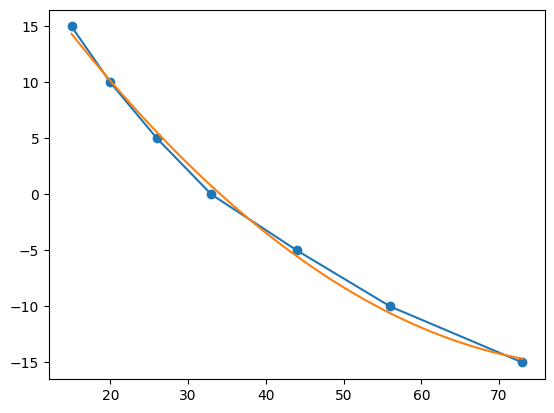

In [21]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(df[["R_Ohm"]], df[["Grad_Celsius"]])
plt.scatter(df[["R_Ohm"]], df[["Grad_Celsius"]])

values_x = range(15,74)
model_x = [[x, x*x] for x in values_x]

plt.plot(values_x, model.predict( model_x ))

In [22]:
values_x

range(15, 74)

In [23]:
model_x

[[15, 225],
 [16, 256],
 [17, 289],
 [18, 324],
 [19, 361],
 [20, 400],
 [21, 441],
 [22, 484],
 [23, 529],
 [24, 576],
 [25, 625],
 [26, 676],
 [27, 729],
 [28, 784],
 [29, 841],
 [30, 900],
 [31, 961],
 [32, 1024],
 [33, 1089],
 [34, 1156],
 [35, 1225],
 [36, 1296],
 [37, 1369],
 [38, 1444],
 [39, 1521],
 [40, 1600],
 [41, 1681],
 [42, 1764],
 [43, 1849],
 [44, 1936],
 [45, 2025],
 [46, 2116],
 [47, 2209],
 [48, 2304],
 [49, 2401],
 [50, 2500],
 [51, 2601],
 [52, 2704],
 [53, 2809],
 [54, 2916],
 [55, 3025],
 [56, 3136],
 [57, 3249],
 [58, 3364],
 [59, 3481],
 [60, 3600],
 [61, 3721],
 [62, 3844],
 [63, 3969],
 [64, 4096],
 [65, 4225],
 [66, 4356],
 [67, 4489],
 [68, 4624],
 [69, 4761],
 [70, 4900],
 [71, 5041],
 [72, 5184],
 [73, 5329]]

In [24]:
[[x, x*x, x*x*x, ] for x in values_x]

[[15, 225, 3375],
 [16, 256, 4096],
 [17, 289, 4913],
 [18, 324, 5832],
 [19, 361, 6859],
 [20, 400, 8000],
 [21, 441, 9261],
 [22, 484, 10648],
 [23, 529, 12167],
 [24, 576, 13824],
 [25, 625, 15625],
 [26, 676, 17576],
 [27, 729, 19683],
 [28, 784, 21952],
 [29, 841, 24389],
 [30, 900, 27000],
 [31, 961, 29791],
 [32, 1024, 32768],
 [33, 1089, 35937],
 [34, 1156, 39304],
 [35, 1225, 42875],
 [36, 1296, 46656],
 [37, 1369, 50653],
 [38, 1444, 54872],
 [39, 1521, 59319],
 [40, 1600, 64000],
 [41, 1681, 68921],
 [42, 1764, 74088],
 [43, 1849, 79507],
 [44, 1936, 85184],
 [45, 2025, 91125],
 [46, 2116, 97336],
 [47, 2209, 103823],
 [48, 2304, 110592],
 [49, 2401, 117649],
 [50, 2500, 125000],
 [51, 2601, 132651],
 [52, 2704, 140608],
 [53, 2809, 148877],
 [54, 2916, 157464],
 [55, 3025, 166375],
 [56, 3136, 175616],
 [57, 3249, 185193],
 [58, 3364, 195112],
 [59, 3481, 205379],
 [60, 3600, 216000],
 [61, 3721, 226981],
 [62, 3844, 238328],
 [63, 3969, 250047],
 [64, 4096, 262144],
 [65, 